## Question 1

### Part A

$F(x) = x^3 + x^2 - 3x -3$

$f(x) = F'(x) = 3x^2 + 2x -3$

Exact roots of $F(x)$ are $-1$ , $\pm\sqrt[]{3}$

In [13]:
import math


def WriteDataToFile(list,myfile):
    myfile.write(', '.join(str(item) for item in list)+'\n')

    
F = lambda x : x**3 + x**2 - 3*x - 3
f = lambda x : 3*x**2 + 2*x - 3
max_iter = 1000
tolerance = 1e-10
x0 = 2.0
x_exactRoot = math.sqrt(3)
error_0 = abs(x_exactRoot - x0)

myfile = open("output_data\\nr.csv", 'a') 
myfile.seek(0) 
myfile.truncate() 
header_array = ["ilteration","x","error","enew/eold","enew/eold^2","enew/eold^3"]
WriteDataToFile(header_array,myfile)
data_array = [0 , x0 , error_0 , 0 , 0 ,0]
WriteDataToFile(data_array,myfile)

 
for i in range(1,max_iter):
    x1 = x0 - F(x0)/f(x0)
    if(error_0 < tolerance):
        break
    error_1 = abs(x1 - x_exactRoot)
    data_array = [i,x1,error_1,error_1/error_0,error_1/error_0**2,error_1/error_0**3]
    WriteDataToFile(data_array,myfile)
    x0 = x1
    error_0 = error_1
myfile.close()


### Results 

| ilteration, | x,                  | error,                  | enew/eold,              | enew/eold^2,        | enew/eold^3        |
|-------------|---------------------|-------------------------|-------------------------|---------------------|--------------------|
| 0,          | 2.0,                | 0.2679491924311228,     | 0,                      | 0,                  | 0                  |
| 1,          | 1.7692307692307692, | 0.03717996166189197,    | 0.13875750594564376,    | 0.517850062120683,  | 1.9326427425370873 |
| 2,          | 1.7329238103969928, | 0.0008730028281156432,  | 0.023480466065419255,   | 0.6315355104167799, | 16.985910748371737 |
| 3,          | 1.7320513061089737, | 4.985400965384912e-07,  | 0.0005710635526972789,  | 0.6541371165198934, | 749.295529697004   |
| 4,          | 1.73205080756904,   | 1.6275869541004795e-13, | 3.2647062200238034e-07, | 0.6548532891720461, | 1313541.8669809767 |



As we can see order of convergence is 2 and that is also matching what we got from theory, Order of convergance for Newton Raphson Method is 2

### Part B

Varying initial guess from -5 to 5 and checking to which root NR method converge 

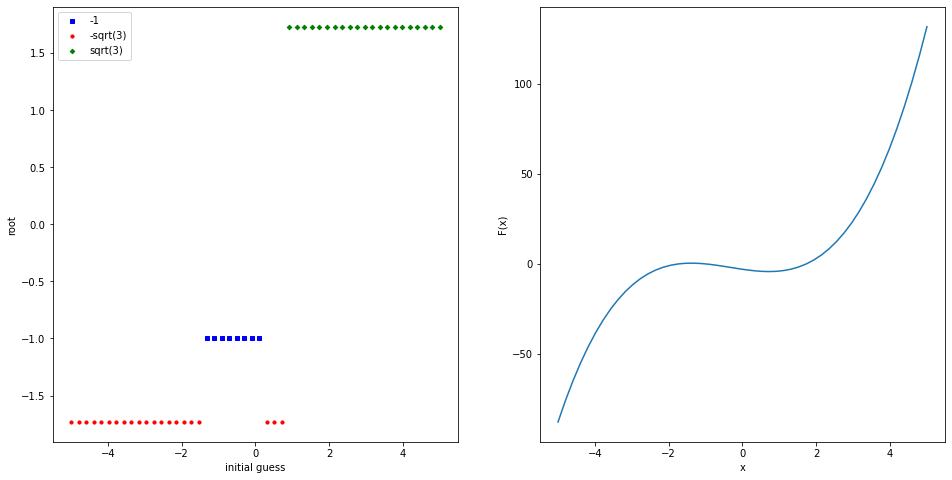

In [14]:
from matplotlib import pyplot as plt
import numpy as np

F = lambda x : x**3 + x**2 - 3*x - 3
f = lambda x : 3*x**2 + 2*x - 3

def FindRoot(initial_guess):
    max_iter = 1000
    tolerance = 1e-10
    x0 = initial_guess
    for i in range(1,max_iter):
        x1 = x0 - F(x0)/f(x0)
        if(abs(x1-x0) < tolerance):
            break
        x0 = x1
    return x1

regime_map = [[],[],[]]
i = -5
exact_roots = [-1,-math.sqrt(3),math.sqrt(3)]

xpts = np.linspace(-5,5,50)

for i in xpts:
    root = FindRoot(i)
    if(abs(root-exact_roots[0]) < 1e-6):
          regime_map[0].append([i,root])
    elif(abs(root-exact_roots[1]) < 1e-6):
          regime_map[1].append([i,root])
    elif(abs(root-exact_roots[2]) < 1e-6):
          regime_map[2].append([i,root])
    else:
        pass


## POST PROCESSING

colors = ['pink', 'skyblue', 'lightgreen']
markers = ['<', 'o', '>']


data_0 = np.array(regime_map[0])
data_1 = np.array(regime_map[1])
data_2 = np.array(regime_map[2])
x0,y0 = data_0.T
x1,y1 = data_1.T
x2,y2 = data_2.T
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.scatter(x0, y0, s=10, c='b', marker="s", label='-1')
ax1.scatter(x1,y1, s=10, c='r', marker="o", label='-sqrt(3)')
ax1.scatter(x2,y2, s=10, c='g', marker="D", label='sqrt(3)')
plt.xlabel("initial guess")
plt.ylabel("root")
plt.legend(loc='upper left');
ax1 = fig.add_subplot(122)
plt.xlabel("x")
plt.ylabel("F(x)")
plt.plot(xpts, F(xpts))
plt.rcParams['figure.figsize'] = [16, 8]
plt.show()